In [ ]:
!wget https://shorturl.at/BLXZ5 -O spam.csv

--2024-01-22 15:25:22--  https://shorturl.at/BLXZ5
Resolving shorturl.at (shorturl.at)... 104.26.9.129, 104.26.8.129, 172.67.69.88, ...
Connecting to shorturl.at (shorturl.at)|104.26.9.129|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.shorturl.at/BLXZ5 [following]
--2024-01-22 15:25:23--  https://www.shorturl.at/BLXZ5
Resolving www.shorturl.at (www.shorturl.at)... 172.67.69.88, 104.26.8.129, 104.26.9.129, ...
Connecting to www.shorturl.at (www.shorturl.at)|172.67.69.88|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv [following]
--2024-01-22 15:25:23--  https://raw.githubusercontent.com/codebasics/py/master/ML/14_naive_bayes/spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)

In [6]:
import pandas as pd
df = pd.read_csv("D:\DATA SCIENCE COURSE\Datacience_Class\Data\spam.csv")
df.head()


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13772\3219719008.py:2: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\DATA SCIENCE COURSE\Datacience_Class\Data\spam.csv")


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape

(5572, 2)

# **Steps :-**
1. Data Cleaning
2. EDA
3. Text Preprocessing
4. Model building
5. Evaluation
6. Improvement
7. Website
8. Deploy

## **Data Cleaning :-**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# renaming the columns
df.rename(columns={'Category':'Target'}, inplace=True)

In [11]:
df.head(5)

,Target,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(df['Target'])

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
df['Target'] = encoder.fit_transform(df['Target'])


In [14]:
df.head(5)

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


* 0 means ham messages .
* 1 means spam messages .

In [15]:
# checking missing values
df.isnull().sum()

Target     0
Message    0
dtype: int64

There is no missing values in both Target and Message columns . So, we don't need to do anything here.

In [16]:
# checking duplicates values
df.duplicated().sum()

415

There is 415 values are duplicated so we will simply drop duplicated value.

In [17]:
df = df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5157, 2)

## **EDA :-**

In [20]:
# How many messages are spam or ham ?

In [21]:
df.head(5)

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['Target'].value_counts()

Target
0    4516
1     641
Name: count, dtype: int64

So, here is 4516 are ham messages and 641 are spam messages .

In [23]:
# visualizing the data
from matplotlib import pyplot as plt

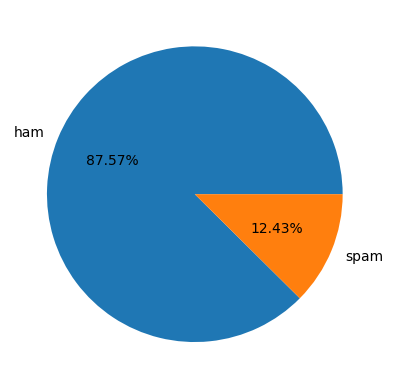

In [24]:
plt.pie(df['Target'].value_counts(), labels=['ham','spam'], autopct='%.2f%%')
plt.show()

This Pie chart shows,
* 87.57% data are ham .
* 12.43% data are spam .

So, here data is imbalanced so we neeed to balance it.

In [25]:
import nltk

In [26]:
!pip install nltk


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
df['Message'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     36
5569     57
5570    125
5571     26
Name: Message, Length: 5157, dtype: int64

In [29]:
# adding new coulmn which will show the no.of characteristics
df['num_characters'] = df['Message'].apply(len)

In [30]:
df.head()

,Target,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
# fetching the number of words
import nltk


In [32]:
# word tokenization

In [33]:
df['Message'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5157, dtype: object

In [34]:
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [35]:
df.head()

,Target,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [36]:
# sentence tokenizaition
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [37]:
df.head()

,Target,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [38]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [39]:
# we can analyze ham and spam messages diferently
# This one for ham messages
df[df['Target'] == 0] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [40]:
# This is for spam messages
df[df['Target'] == 1] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

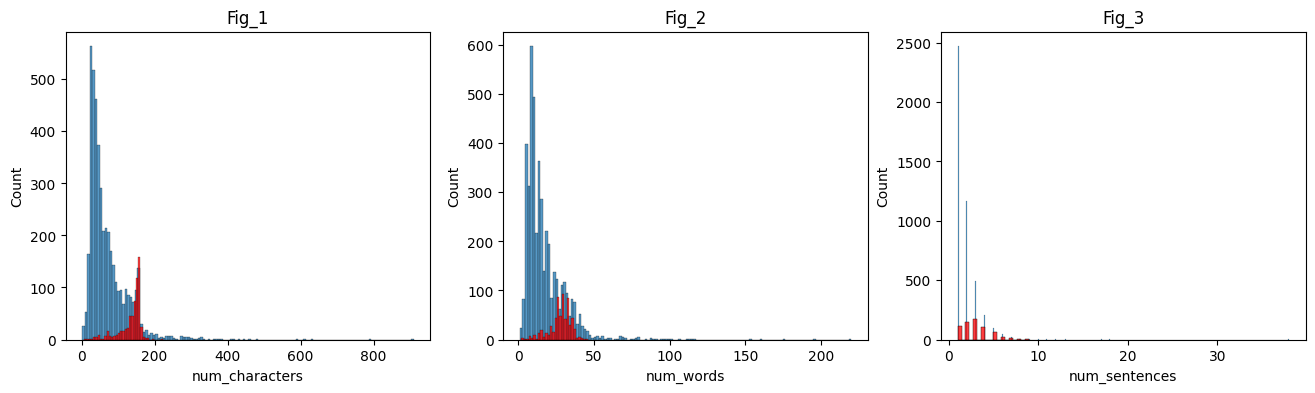

In [47]:
# plotting the histogram for number of characteristics column
plt.figure(figsize=(16,4))

plt.subplot(1,3,1)
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'], color='red')
plt.title("Fig_1")

plt.subplot(1,3,2)
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'], color='red')
plt.title("Fig_2")

plt.subplot(1,3,3)
sns.histplot(df[df['Target']==0]['num_sentences'])
sns.histplot(df[df['Target']==1]['num_sentences'], color='red')
plt.title("Fig_3")
plt.show()

Fig_1 shows,
* most of the ham messages is made from more characters .
* most of the spam message is made from less characters.

Fig_2 shows,
* most of the ham messages is made from more words.
* most of the spam messages is made from less words.

Fig_3 shows,
* most of the ham messages is made from less sentences.
* most of the spam messages is made from more sentences.


In [ ]:
df.corr()

<ipython-input-39-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Target,num_characters,num_words,num_sentences
Target,1.000000,0.374409,0.255968,0.259023
num_characters,0.374409,1.000000,0.966155,0.622428
num_words,0.255968,0.966155,1.000000,0.679396
num_sentences,0.259023,0.622428,0.679396,1.000000


<ipython-input-40-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

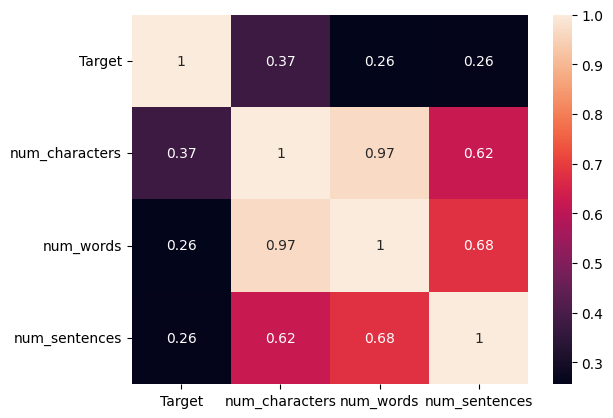

In [ ]:
sns.heatmap(df.corr(),annot=True)